### Standardize, clean and wrangle Water Quality Portal data in Cape Cod into more analytic-ready formats using the harmonize_wq package

US EPA’s Water Quality Portal (WQP) aggregates water quality, biological, and physical data provided by many organizations and has become an essential resource with tools to query and retrieval data using python or R. Given the variety of data and variety of data originators, using the data in analysis often requires data cleaning to ensure it meets the required quality standards and data wrangling to get it in a more analytic-ready format. Recognizing the definition of analysis-ready varies depending on the analysis, the harmonixe_wq package is intended to be a flexible water quality specific framework to help:
- Identify differences in data units (including speciation and basis)
- Identify differences in sampling or analytic methods
- Resolve data errors using transparent assumptions
- Reduce data to the columns that are most commonly needed
- Transform data from long to wide format

Domain experts must decide what data meets their quality standards for data comparability and any thresholds for acceptance or rejection.

#### Simple workflow

This example steps through a typical workflow in Cape Cod to demonstrate commonly used functionality

##### Install the required libraries

In [1]:
import sys
#!python -m pip uninstall harmonize-wq --yes
# Use pip to install the package from pypi or the latest from github
#!{sys.executable} -m pip install harmonize-wq
# For latest dev version
!{sys.executable} -m pip install git+https://github.com/USEPA/harmonize-wq.git

  Running command git clone --filter=blob:none --quiet https://github.com/USEPA/harmonize-wq.git 'C:\Users\jbousqui\AppData\Local\Temp\pip-req-build-ghsnqs7z'



  Cloning https://github.com/USEPA/harmonize-wq.git to c:\users\jbousqui\appdata\local\temp\pip-req-build-ghsnqs7z
  Resolved https://github.com/USEPA/harmonize-wq.git to commit 5d0e426f9388bc75fa395d2b7475363979d6c2db
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


##### Create dataretrieval query using a polygon for Area Of Interest

In [2]:
from harmonize_wq import wrangle

In [3]:
# Read geometry for Area of Interest from geojson file url
# NOTE: alternatively you can direct it to a local shapefile
aoi_url = 'https://github.com/jbousquin/test_notebook/raw/main/temperature_data/NewEngland.geojson'

<Axes: >

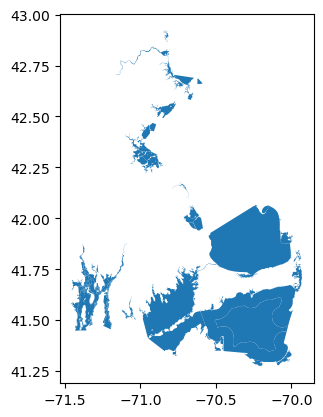

In [4]:
# Map aoi (geojson is WGS1984 standard)
wrangle.as_gdf(aoi_url).plot()

The Area Of Interest is made up of many small polygons. The query will be built from the total extent of these polygons, but alternatively could be restricted to the bounding box for just one such polygon.

In [5]:
# Bounding box string for total extent
bBox = wrangle.get_bounding_box(aoi_url)
# Bounding box string for specific polygon by index
#bBox = wrangle.get_bounding_box(aoi_url, idx=0)

In [6]:
# Build query
query = {'characteristicName': ['Phosphorus',
                                'Temperature, water',
                                'Depth, Secchi disk depth',
                                'Dissolved oxygen (DO)',
                                'Salinity',
                                'pH',
                                'Nitrogen',
                                'Conductivity',
                                'Organic carbon',
                                'Chlorophyll a',
                                'Turbidity',
                                'Sediment',
                                'Fecal Coliform',
                                'Escherichia coli']}
query['bBox'] = bBox
query['dataProfile'] = 'narrowResult'

##### Retrieve data

Stations will be retrieved using the query criteria seperately after results. md_narrow is metadata documenting the query not used here but meant for reproducibility

In [7]:
import dataretrieval.wqp as wqp

In [8]:
# Query for results
# Note: large quieries like this can take up a lot of RAM and may give a DtypeWarning,
# set low_memory=False or provide dataTypes for columns to use less memory. 
res_narrow, md_narrow = wqp.get_results(**query)

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\dataretrieval\wqp.py:83: DtypeWarning: Columns (8,10,13,15,17,19,20,21,22,23,28,31,32,33,34,36,38,60,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(StringIO(response.text), delimiter=',')


In [9]:
# Look at initial results (input)
df = res_narrow
df

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,AnalysisEndTime/TimeZoneCode,ResultLaboratoryCommentCode,ResultLaboratoryCommentText,ResultDetectionQuantitationLimitUrl,LaboratoryAccreditationIndicator,LaboratoryAccreditationAuthorityName,TaxonomistAccreditationIndicator,TaxonomistAccreditationAuthorityName,LabSamplePreparationUrl,ProviderName
0,CRWA,Charles River Watershed Association (Massachus...,CRWA-CYN20130809ROBTemp01,2013-08-09,11:14:33,EST,CRWA-ROB,STORET-591631481,130809111433.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
1,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-CACO_HX30_21_7/22/2013_SFW_0.01,2013-07-22,11:01:00,EDT,11NPSWRD_WQX-CACO_HX30_21,STORET-986369728,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
2,MASSDEP,Massachusetts Department of Environmental Prot...,MASSDEP-LB-5142,2013-07-30,14:20:00,EDT,MASSDEP-W2173,STORET-762955917,NaN,NaN,...,NaN,NaN,NaN,https://www.waterqualitydata.us/data/providers...,NaN,NaN,NaN,NaN,NaN,STORET
3,IRWA,Ipswich River Watershed Association (Volunteer),IRWA-HB:20130630120000:FM,2013-06-30,12:00:00,EDT,IRWA-HB,STORET-853064665,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
4,CRWA,Charles River Watershed Association (Massachus...,CRWA-VMM20131217609SEC02,2013-12-17,07:40:00,EST,CRWA-609S,STORET-872379847,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STORET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334686,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
334687,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
334688,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708075,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS
334689,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708077,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWIS


##### Harmonize data using defaults

In [10]:
from harmonize_wq import harmonize
from harmonize_wq import location
from harmonize_wq import visualize

In [11]:
# Harmonize it and look at how it changed (output)
# Note: 'ignore' unit dimensionality errors will warn when they are encountered and replace with NaN
# Note: depending on the Pint version this may cause a UnitStrippedWarning
df_harmonized = harmonize.harmonize_all(df, errors='ignore')
df_harmonized

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'cm3/g' UNDEFINED UNIT for Nitrogen
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\construction.py:616: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.array(data, copy=copy)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:131: UserWarning: WARNING: 'ug/cm2' UNDEFINED UNIT for Chlorophyll
  warn("WARNING: " + problem)
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\harmonize_wq\harmonize.py:1

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,Phosphorus,TP_Phosphorus,TDP_Phosphorus,Other_Phosphorus,Sediment,Conductivity,DO,E_coli,Salinity,pH
0,CRWA,Charles River Watershed Association (Massachus...,CRWA-CYN20130809ROBTemp01,2013-08-09,11:14:33,EST,CRWA-ROB,STORET-591631481,130809111433.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-CACO_HX30_21_7/22/2013_SFW_0.01,2013-07-22,11:01:00,EDT,11NPSWRD_WQX-CACO_HX30_21,STORET-986369728,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MASSDEP,Massachusetts Department of Environmental Prot...,MASSDEP-LB-5142,2013-07-30,14:20:00,EDT,MASSDEP-W2173,STORET-762955917,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IRWA,Ipswich River Watershed Association (Volunteer),IRWA-HB:20130630120000:FM,2013-06-30,12:00:00,EDT,IRWA-HB,STORET-853064665,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.6 milligram / liter,NaN,NaN,NaN
4,CRWA,Charles River Watershed Association (Massachus...,CRWA-VMM20131217609SEC02,2013-12-17,07:40:00,EST,CRWA-609S,STORET-872379847,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334686,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334687,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334688,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708075,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490.0 Colony_Forming_Units / milliliter,NaN,NaN
334689,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,EDT,USGS-01100000,NWIS-125708077,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Get harmonized stations clipped to the Area of Interest
stations_gdf, stations, site_md = location.get_harmonized_stations(query, aoi=aoi_url)

<Axes: >

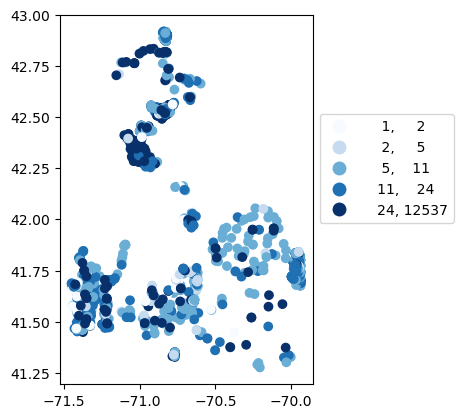

In [13]:
# Map number of usable results at each station
gdf_count = visualize.map_counts(df_harmonized, stations_gdf)
legend_kwds={"fmt": "{:.0f}", 'bbox_to_anchor':(1, 0.75)}
gdf_count.plot(column='cnt', cmap='Blues', legend=True, scheme='quantiles', legend_kwds=legend_kwds)

<Axes: >

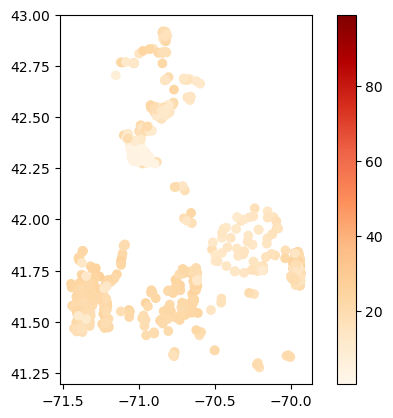

In [14]:
# Map average temperature results at each station
gdf_temperature = visualize.map_measure(df_harmonized, stations_gdf, 'Temperature')
gdf_temperature.plot(column='mean', cmap='OrRd', legend=True)

##### Clean additional columns of data

In [15]:
from harmonize_wq import clean

In [16]:
df_cleaned = clean.datetime(df_harmonized)  # datetime
df_cleaned = clean.harmonize_depth(df_cleaned)  # Sample depth

C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\dataretrieval\utils.py:87: UserWarning: Warning: 104530 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(
C:\Users\jbousqui\Local_GIS\Python\Miniforge3\envs\jupyter-harmonize\lib\site-packages\pandas\core\dtypes\cast.py:1784: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


##### Reduce data to the columns that are most commonly needed

There are many columns in the dataframe that are characteristic specific, that is they have different values for the same sample depending on the characteristic. To ensure one result for each sample after the transformation of the data these columns must either be split, generating a new column for each characteristic with values, or moved out from the table if not being used.

In [17]:
# Split single QA column into multiple by characteristic (rename the result to preserve these QA_flags)
df_expanded = wrangle.split_col(df_cleaned)
df_expanded

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,MonitoringLocationIdentifier,ResultIdentifier,DataLoggerLine,ResultDetectionConditionText,...,QA_Temperature,QA_TP_Phosphorus,QA_TDP_Phosphorus,QA_Other_Phosphorus,QA_Sediment,QA_Conductivity,QA_DO,QA_E_coli,QA_Salinity,QA_pH
0,CRWA,Charles River Watershed Association (Massachus...,CRWA-CYN20130809ROBTemp01,2013-08-09,11:14:33,-0500,CRWA-ROB,STORET-591631481,130809111433.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11NPSWRD_WQX,National Park Service Water Resources Division,11NPSWRD_WQX-CACO_HX30_21_7/22/2013_SFW_0.01,2013-07-22,11:01:00,-0400,11NPSWRD_WQX-CACO_HX30_21,STORET-986369728,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MASSDEP,Massachusetts Department of Environmental Prot...,MASSDEP-LB-5142,2013-07-30,14:20:00,-0400,MASSDEP-W2173,STORET-762955917,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IRWA,Ipswich River Watershed Association (Volunteer),IRWA-HB:20130630120000:FM,2013-06-30,12:00:00,-0400,IRWA-HB,STORET-853064665,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MASSDEP,Massachusetts Department of Environmental Prot...,MASSDEP-SM-4452,2013-09-25,09:05:00,-0400,MASSDEP-W0696,STORET-762964497,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334686,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708049,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334687,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334688,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708075,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334689,USGS-MA,USGS Massachusetts Water Science Center,nwisma.01.02301798,2023-07-05,10:30:00,-0400,USGS-01100000,NWIS-125708077,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Split table into main with columns of interest and characteristic specific columns/metadata
main_df, chars_df = wrangle.split_table(df_expanded)

In [19]:
# Drop empty columns (QA columns without flags)
main_df_small = main_df.dropna(axis=1, how='all')

##### Transform data from long to wide format

In [20]:
transformed_df = wrangle.collapse_results(main_df_small)

Results are collapsed by retaining the first result that isn't NAN. There can be several reasons for multiple results for the same parameter/characteristic sampled at the same station, time and by the same organization. The collapse_results function assumes the user has already reviewed the quality of all results and narrowed down instances of multiple results to only the desired/best/highest quality result before running this function.